# WeRateDogs data cleansing and analysis
## 收集

In [1]:
# 导入需要的库
import pandas as pd
import numpy as np
import requests 
import os
import json
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# 收集文件 1 保存为 dataframe
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 收集文件 2 保存为 dataframe
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

In [4]:
file_name = 'image-predictions.tsv'
with open(file_name, mode='wb') as file:
    file.write(response.content)

In [5]:
df_image = pd.read_csv('image-predictions.tsv', sep='\t')
df_image.shape

(2075, 12)

In [6]:
# 收集文件 3 保存为 dataframe
df_1 = pd.DataFrame()
with open('tweet_json.txt') as json_file:
    for line in json_file.readlines():
        dic = json.loads(line)
        data = {"id": dic['id'],
               "retweet_count": dic['retweet_count'],
               "favorite_count": dic['favorite_count']
               }
        tem_df = pd.DataFrame(data, index=[0])
        df_1 = pd.concat([df_1, tem_df])

In [7]:
 df_1.head()

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
0,892177421306343426,6480,33786
0,891815181378084864,4301,25445
0,891689557279858688,8925,42863
0,891327558926688256,9721,41016


In [8]:
dic

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'id': 666020888022790149,
 'id_str': '666020888022790149',
 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
 'truncated': False,
 'display_text_range': [0, 131],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'url': 'https://t.co/BLDqew2Ijj',
    'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'type': 'photo',
    'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 680, 'h': 510, 'resize': 'fit

## 评估
### 目测评估

In [9]:
# 目测评估三个数据集

In [10]:
#显示表格df (twitter_archive_enhanced)
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


`df`各列包括

**tweet_id** ：是推特链接的最后一部分， 位于 "status/" 后面 → https://twitter.com/dog_rates/status/889531135344209921  
**in_reply_to_status_id** :回复状态ID  
**in_reply_to_user_id** : 回复用户ID  
**timestamp** ：推特发布时间戳  
**source**　：推特来源（推特发布网址）  
**text** ： 推特文本  
**retweeted_status_id** ：转发ID  
**retweeted_status_user_id** ： 转发用户ID  
**retweeted_status_timestamp** ： 转发时间戳  
**expanded_urls** ：扩展网址  
**rating_numerator** ： 评级分子  
**rating_denominator** ： 评级分母  
**name** : 狗的名字  
**doggo,floofer,pupper,puppo** : 狗的“地位”


In [11]:
#显示表格df_image (image-predictions)
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


`df_image`各列包括

**tweet_id** ：是推特链接的最后一部分，位于 "status/" 后面 → https://twitter.com/dog_rates/status/889531135344209921  
**jpg_url** ：是预测的图像资源链接  
**img_num** ：最可信的预测结果对应的图像编号 → 1 推特中的第一张图片  
**p1** ：是算法对推特中图片的一号预测 → 金毛犬  
**p1_conf** ：是算法的一号预测的可信度 → 95%  
**p1_dog** ：是一号预测该图片是否属于“狗”（有可能是其他物种，比如熊、马等） → True 真  
**p2** ：是算法对推特中图片预测的第二种可能性 → 拉布拉多犬  
**p2_conf** ：是算法的二号预测的可信度 → 1%  
**p2_dog** ：是二号预测该图片是否属于“狗” → True 真  
以此类推...  

In [12]:
#显示表格df_1
df_1

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
0,892177421306343426,6480,33786
0,891815181378084864,4301,25445
0,891689557279858688,8925,42863
0,891327558926688256,9721,41016
0,891087950875897856,3240,20548
0,890971913173991426,2142,12053
0,890729181411237888,19548,66596
0,890609185150312448,4403,28187
0,890240255349198849,7684,32467


`df_1`各列包括

**id** 是推特链接的最后一部分，位于 "status/" 后面 → https://twitter.com/dog_rates/status/889531135344209921  
**retweet_count** 是推特文章转发数  
**favorite_count** 是推特文章喜欢数

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

**df 数据集编程评估**

In [13]:
#显示df 摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
type(df['timestamp'][1])

str

In [15]:
#计算df 冗余行数
sum(df.duplicated())

0

In [16]:
#显示df 前五行数据
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
#显示df 最后五行数据
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [18]:
#显示df 随机五组数据
pd.set_option('display.max_colwidth',500)
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
965,750429297815552001,NaN,NaN,2016-07-05 20:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arnie. He's a Nova Scotian Fridge Floof. Rare af. 12/10 https://t.co/lprdOylVpS,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/750429297815552001/photo/1,https://twitter.com/dog_rates/status/750429297815552001/photo/1",12,10,Arnie,None,None,None,None
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13,10,None,None,None,None,None
2129,670290420111441920,NaN,NaN,2015-11-27 17:17:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sandra. She's going skydiving. Nice adidas sandals. Stellar house plant. 11/10 https://t.co/orbkAq9kYF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670290420111441920/photo/1,11,10,Sandra,None,None,None,None
994,748568946752774144,NaN,NaN,2016-06-30 17:28:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cora. She rings a bell for treats. 12/10 precious af (vid by @skyehellenkamp) https://t.co/uUncaAGH18,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748568946752774144/video/1,12,10,Cora,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*internally screaming* 12/10 https://t.co/YMcrXC2Y6R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158376562688/photo/1,12,10,None,None,None,None,None


In [19]:
#显示df 描述性统计信息
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
#显示df tweet_id列  value_counts信息
df['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

******

**df_image 数据集编程评估**

In [21]:
#显示df_image 摘要
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
type(df_image['p1'][1])

str

In [23]:
#计算df_image 冗余行数
sum(df_image.duplicated())

0

In [24]:
#显示df_image 前五行数据
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
#显示df_image 最后五行数据
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [26]:
#显示df_image 随机五组数据
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1719,819227688460238848,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,1,Border_terrier,0.482452,True,German_shepherd,0.181082,True,Norwegian_elkhound,0.065257,True
64,667171260800061440,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,1,giant_schnauzer,0.841265,True,Lakeland_terrier,0.052744,True,Irish_water_spaniel,0.034402,True
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
1769,827324948884643840,https://pbs.twimg.com/media/C3s_pYrXAAA1eqZ.jpg,1,golden_retriever,0.352486,True,toy_poodle,0.178884,True,Labrador_retriever,0.084164,True
1383,765669560888528897,https://pbs.twimg.com/media/CqA0XcYWAAAzltT.jpg,1,beagle,0.993333,True,Walker_hound,0.002902,True,basset,0.002415,True


In [27]:
#显示df_image 描述性统计信息
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
#显示df_image tweet_id列value_counts信息
df_image['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

****

**df_1 数据集编程评估**

In [29]:
#显示df_1 摘要
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 0
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 73.5 KB


In [30]:
#显示 df_1前五行数据
df_1.head()

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
0,892177421306343426,6480,33786
0,891815181378084864,4301,25445
0,891689557279858688,8925,42863
0,891327558926688256,9721,41016


In [31]:
#显示df_1 最后行数据
df_1.tail()

,id,retweet_count,favorite_count
0,666049248165822465,41,111
0,666044226329800704,147,309
0,666033412701032449,47,128
0,666029285002620928,48,132
0,666020888022790149,530,2528


In [32]:
#计算df_1 冗余行数
sum(df_1.duplicated())

0

In [33]:
#显示df_1 随机五组数据
df_1.sample(5)

,id,retweet_count,favorite_count
0,805958939288408065,6201,0
0,676121918416756736,1293,2321
0,671882082306625538,1486,3667
0,684800227459624960,1114,2961
0,671355857343524864,119,504


In [34]:
#显示df_1 描述性统计信息
df_1.describe()

,id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [35]:
#显示df_1 retweet_count 和 favorite_count 列value_counts信息
df_1['retweet_count'].value_counts()

1280     5
312      5
745      5
1554     4
1103     4
1201     4
37       4
61       4
606      4
680      4
701      4
182      4
6925     4
8471     4
468      4
252      3
1873     3
2690     3
71       3
118      3
1036     3
516      3
617      3
2142     3
280      3
263      3
521      3
1084     3
698      3
985      3
        ..
2482     1
4533     1
4535     1
441      1
2490     1
445      1
4479     1
377      1
325      1
2422     1
329      1
333      1
8527     1
6480     1
10580    1
345      1
347      1
2400     1
4449     1
705      1
6500     1
357      1
6504     1
361      1
6506     1
367      1
4465     1
2418     1
2420     1
0        1
Name: retweet_count, Length: 1752, dtype: int64

In [36]:
df_1['favorite_count'].value_counts()

0        177
1753       3
3548       3
689        3
1526       3
520        3
465        3
171        3
3508       3
343        3
2417       3
3217       2
3846       2
1501       2
2452       2
262        2
195        2
242        2
2616       2
2250       2
3221       2
1085       2
1187       2
1722       2
248        2
1124       2
14506      2
2231       2
1861       2
5377       2
        ... 
4715       1
23100      1
2644       1
8769       1
1671       1
39492      1
1498       1
5773       1
10824      1
1046       1
21069      1
35406      1
4687       1
2381       1
31314      1
8575       1
17001      1
12887      1
2648       1
4697       1
4699       1
2652       1
6750       1
8799       1
2656       1
10852      1
5878       1
14950      1
6760       1
15858      1
Name: favorite_count, Length: 2023, dtype: int64

In [37]:
pd.set_option('display.max_colwidth',500)
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

#### 质量
##### `df` 表格
1. in_reply_to_status_id，expanded_urls等列存在缺失值
2. tweet_id 等列数据类型错误 
3. name存在提取错误现象
4. 评分存在提取错误现象



##### `df_image` 表格
1. 狗的品种写法不统一   
2. tweet_id 列数据类型错误


##### `df_1` 表格
1. id 列数据类型错误
- id 列列名错误


#### 整洁度
1.  应将df_image 数据集中jpg_url,img_num...等列复制到df 中
- 应将df_1中retweet_count,favorite_count两列复制到df中  
3. 缺少评分项




## 清理

In [38]:
# 备份三个数据集
df_clean = df.copy()
df_image_clean = df_image.copy()
df_1_clean = df_1.copy()

#### 问题描述一：in_reply_to_status_id，expanded_urls等列存在缺失值等列有非空值

##### 定义
in_reply_to_status_id等列与此次分析关系不大，drop掉；由于结果要求最终数据无转发数据，所以对retweeted_status_id, retweeted_status_user_id运用drop删除非空值数据。

##### 代码

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [40]:
# 解决问题一的代码
index = df_clean[df_clean.retweeted_status_id.notnull()].index
df_clean = df_clean.drop(index)

In [41]:
#删除in_reply_to_status_id 等无关列
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [42]:
#删除expanded_urls 含缺失值的数据
df_clean = df_clean.drop(index = df_clean[df_clean.expanded_urls.isnull()].index)

##### 测试

In [43]:
# 测试问题一是否正确清理完成
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2117 non-null int64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 264.6+ KB


#### 问题描述二:tweet_id 等列数据类型错误

##### 定义
运用astype 转换格式为str

##### 代码

In [44]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')

##### 测试

In [45]:
# 测试问题二是否正确清理完成
type(df_clean['tweet_id'][1])

str

#### 问题描述三：name存在提取错误现象

##### 定义
重新运用正则表达式提取name,并删除含缺失值的行

##### 代码


In [46]:
# 原数据中没有提取到正确 name 的条件，name 列为小写或者为字符串 'None'
pd.set_option('display.max_colwidth',200)
no_name_mask = (df_clean.name.str.islower())|(df_clean.name =='None')

In [47]:
#查看name 提取规律
df_clean.loc[~no_name_mask,["name", "text"]].sample(10)

,name,text
1395,Cooper,This is Cooper. He began to tear up when his bone was taken from him. 11/10 stay strong pupper https://t.co/qI8yvqKG02
2167,Saydee,Meet Saydee. She's a Rochester Ecclesiastical. Jumped off cliff and caught stick on way down. 11/10 1st round pick https://t.co/Eh2v0AyJbi
779,Blue,This is Blue. He was having an average day until his owner told him about Bront. 12/10 h*ckin hysterical af https://t.co/saRYTcxQeH
331,Rhino,"This is Rhino. He arrived at a shelter with an elaborate doggo manual for his new family, written by someone who will always love him. 13/10 https://t.co/QX1h0oqMz0"
1845,Pepper,"This is Pepper. She's not fully comfortable riding her imaginary bike yet. 10/10 don't worry pupper, it gets easier https://t.co/40dj4eTsXG"
1710,Penny,This is Penny. Her tennis ball slowly rolled down her cone and into the pool. 8/10 bad things happen to good puppers https://t.co/YNWU7LeFgg
166,Milky,Meet Milky. She has no idea what happened. Just as pupset as you. Perhaps a sheep exploded. Even offered to help clean. 12/10 very good girl https://t.co/g8vpXFzw29
891,Emma,This is Emma. She can't believe her last guess didn't hit. Convinced ur stacking them on top of each other. 10/10 https://t.co/JRV1dhBYwu
75,Shadow,"Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6"
464,Strudel,Meet Strudel. He's rather h*ckin pupset that your clothes clash. 11/10 click the link to see how u can help Strudel\n\nhttps://t.co/3uxgLz8d0l https://t.co/O0ECL1StB2


In [48]:
#运用正则表达式重新提取name
df_clean.name = df_clean.text.str.extract('([A-Z][a-z]*)(?:(\.|\;|,))', expand=False)

In [70]:
df_clean['name'].sample(10)

1665          Taco
2325        Walter
635          Dobby
1274        Cletus
901     Brandonald
903           Odie
936           Hank
837       Philbert
468          Chloe
1529       Maxwell
Name: name, dtype: object

In [71]:
#删除name 列含缺失值的数据
df_clean = df_clean.drop(index = df_clean[df_clean.name.isnull()].index)

##### 测试

In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      1536 non-null object
timestamp                     1536 non-null object
source                        1536 non-null object
text                          1536 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1536 non-null object
rating_numerator              1536 non-null int64
rating_denominator            1536 non-null int64
name                          1536 non-null object
doggo                         1536 non-null object
floofer                       1536 non-null object
pupper                        1536 non-null object
puppo                         1536 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 192.0+ KB


In [74]:
df_clean.name.sample(10)

873        Bruce
1773    Jessifer
1480     Lincoln
1133    Flurpson
1809         Ash
2135        Liam
1201        Ozzy
1835     Striker
1868      Arnold
510          Moe
Name: name, dtype: object

#### 问题描述四：评分分子分母存在提取错误现象

##### 定义
查看评分分子分母错误情况，并对错误数据进行drop 处理

##### 代码

In [75]:
#原数据中分母不为10，分子过大的值（比如大于20）
no_rate_mask = (df_clean.rating_numerator >= 20)|(df_clean.rating_denominator != 10)

In [76]:
df_clean.loc[no_rate_mask,["rating_numerator","rating_denominator", "text"]]

,rating_numerator,rating_denominator,text
516,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695,75,10,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,27,10,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
979,1776,10,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1068,9,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1202,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1274,45,50,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1662,7,11,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
1779,144,120,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
2335,1,2,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [77]:
#删除分子分母异常列
df_clean = df_clean.drop(df_clean.loc[no_rate_mask].index)

##### 测试

In [78]:
df_clean.loc[no_rate_mask,["rating_numerator","rating_denominator", "text"]]

,rating_numerator,rating_denominator,text


In [79]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      1526 non-null object
timestamp                     1526 non-null object
source                        1526 non-null object
text                          1526 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1526 non-null object
rating_numerator              1526 non-null int64
rating_denominator            1526 non-null int64
name                          1526 non-null object
doggo                         1526 non-null object
floofer                       1526 non-null object
pupper                        1526 non-null object
puppo                         1526 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 190.8+ KB


#### 问题描述五：狗的品种写法不统一

##### 定义
狗品种全部小写，用“_”连接

##### 代码

In [107]:
def change(p):
    for col in p:
        p = p.str.lower()
        p = p.str.replace("-","_")
        p = p.str.replace(" ","_")
    

In [108]:
change(df_image_clean['p1'])
change(df_image_clean['p2'])
change(df_image_clean['p3'])


##### 测试

In [111]:
df_image_clean['p1'].sample(10)

2022                      tusker
512                      hamster
1272                      muzzle
154     chesapeake_bay_retriever
1323                    pembroke
1126                  pomeranian
1182              cocker_spaniel
45                         snail
1253                      paddle
839                      hamster
Name: p1, dtype: object

#### 问题描述六：tweet_id 列数据类型错误

##### 定义
astype转换数据格式为str

##### 代码

In [112]:
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype('str')

##### 测试

In [113]:
type(df_image_clean['tweet_id'][1])

str

#### 问题描述七:id 列数据类型错误

##### 定义
astype转换数据格式为str

##### 代码

In [114]:
df_1_clean['id'] = df_1_clean['id'].astype('str')

##### 测试

In [115]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 0
Data columns (total 3 columns):
id                2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.5+ KB


#### 问题描述八:id 列列名错误

##### 定义
id列rename重命名列名为tweet_id

##### 代码

In [116]:
df_1_clean = df_1_clean.rename(index=str, columns={"id": "tweet_id"})

##### 测试

In [117]:
df_1_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
0,892177421306343426,6480,33786
0,891815181378084864,4301,25445
0,891689557279858688,8925,42863
0,891327558926688256,9721,41016
0,891087950875897856,3240,20548
0,890971913173991426,2142,12053
0,890729181411237888,19548,66596
0,890609185150312448,4403,28187
0,890240255349198849,7684,32467


#### 问题描述九:应将df_image 数据集中jpg_url,img_num...等列复制到df 中

##### 定义
根据tweet_id ，merge两个dataframe

##### 代码

In [118]:
df_new = pd.merge(df_clean, df_image_clean, on='tweet_id', how='inner')

##### 测试

In [119]:
df_new.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,...,1,chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [120]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1478
Data columns (total 26 columns):
tweet_id                      1479 non-null object
timestamp                     1479 non-null object
source                        1479 non-null object
text                          1479 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1479 non-null object
rating_numerator              1479 non-null int64
rating_denominator            1479 non-null int64
name                          1479 non-null object
doggo                         1479 non-null object
floofer                       1479 non-null object
pupper                        1479 non-null object
puppo                         1479 non-null object
jpg_url                       1479 non-null object
img_num                       1479 non-null int64
p1                            1479 n

#### 问题描述十:应将df_1中retweet_count,favorite_count两列复制到df中

##### 定义
根据tweet_id ，merge两个dataframe

##### 代码

In [121]:
df_new = pd.merge(df_new, df_1_clean, on='tweet_id', how='inner')

##### 测试

In [122]:
df_new.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016


In [123]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1478
Data columns (total 28 columns):
tweet_id                      1479 non-null object
timestamp                     1479 non-null object
source                        1479 non-null object
text                          1479 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1479 non-null object
rating_numerator              1479 non-null int64
rating_denominator            1479 non-null int64
name                          1479 non-null object
doggo                         1479 non-null object
floofer                       1479 non-null object
pupper                        1479 non-null object
puppo                         1479 non-null object
jpg_url                       1479 non-null object
img_num                       1479 non-null int64
p1                            1479 n

#### 问题描述十一:缺少评分项

##### 定义
根据tweet_id ，merge两个dataframe

##### 代码

In [124]:
df_new['score'] = df_new['rating_numerator'] / df_new['rating_denominator']

##### 测试

In [125]:
df_new.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,score
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,...,False,bagel,0.085851,False,banana,0.076110,False,8842,39492,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,...,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016,1.2


In [126]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1478
Data columns (total 29 columns):
tweet_id                      1479 non-null object
timestamp                     1479 non-null object
source                        1479 non-null object
text                          1479 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1479 non-null object
rating_numerator              1479 non-null int64
rating_denominator            1479 non-null int64
name                          1479 non-null object
doggo                         1479 non-null object
floofer                       1479 non-null object
pupper                        1479 non-null object
puppo                         1479 non-null object
jpg_url                       1479 non-null object
img_num                       1479 non-null int64
p1                            1479 n

In [129]:
df_new['score'].max()

1.4

### 存储清理后的主数据集

In [130]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df_new.to_csv('twitter_archive_master.csv', index=False)

## 分析和可视化

In [131]:
# 读取文件
df_final = pd.read_csv('twitter_archive_master.csv')

In [132]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 29 columns):
tweet_id                      1479 non-null int64
timestamp                     1479 non-null object
source                        1479 non-null object
text                          1479 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1479 non-null object
rating_numerator              1479 non-null int64
rating_denominator            1479 non-null int64
name                          1479 non-null object
doggo                         1479 non-null object
floofer                       1479 non-null object
pupper                        1479 non-null object
puppo                         1479 non-null object
jpg_url                       1479 non-null object
img_num                       1479 non-null int64
p1                            1479 n

In [133]:
df_final.describe()

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,score
count,1.479000e+03,0.0,0.0,0.0,1479.000000,1479.0,1479.000000,1479.000000,1.479000e+03,1.479000e+03,1479.000000,1479.000000,1479.000000
mean,7.429130e+17,NaN,NaN,NaN,10.663286,10.0,1.204868,0.596096,1.365136e-01,6.081930e-02,2723.416498,9298.141988,1.066329
std,6.933518e+16,NaN,NaN,NaN,1.968342,0.0,0.565664,0.271732,1.013726e-01,5.156294e-02,4016.162113,11715.630791,0.196834
min,6.660209e+17,NaN,NaN,NaN,2.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,23.000000,107.000000,0.200000
25%,6.776992e+17,NaN,NaN,NaN,10.000000,10.0,1.000000,0.363264,5.370120e-02,1.591075e-02,664.000000,2188.500000,1.000000
50%,7.195514e+17,NaN,NaN,NaN,11.000000,10.0,1.000000,0.593858,1.215000e-01,5.000780e-02,1500.000000,4699.000000,1.100000
75%,7.995904e+17,NaN,NaN,NaN,12.000000,10.0,1.000000,0.849540,1.981355e-01,9.402800e-02,3332.000000,12237.000000,1.200000
max,8.924206e+17,NaN,NaN,NaN,14.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,56373.000000,107834.000000,1.400000


`由上图结果`我们可得出狗的评分最高为1.4分，最低为0.2分。

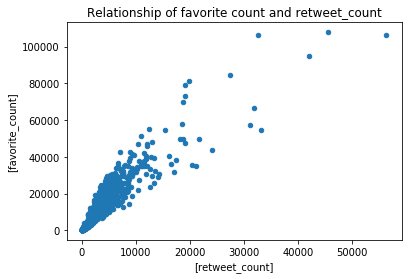

In [134]:
# 对推特喜欢数与转发数进行可视化
df_final.plot.scatter(x=['retweet_count'], y=['favorite_count'])
plt.title('Relationship of favorite count and retweet_count');

`由可视化结果`我们可得出转发数和喜爱数成正比。

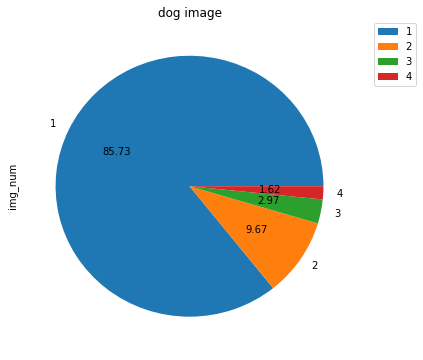

In [135]:
# 最可信的预测结果对应的图像编号可视化
df_final['img_num'].value_counts().plot.pie(subplots=True, figsize=(6, 6),  autopct="%.2f")
plt.title('dog image')
plt.legend(loc='upper right')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0);

`由可视化结果`我们可得出1号图片预测结果占比最高，其次是2，3，4号图片。

> 注意：由于数据的不完整性，缺失值无法得知具体原因，故本报告结果仅供参考！